# Image Recognition with the Digits Dataset

Author: Greg Strabel

The purpose of this notebook is to demonstrate a few common machine learning algorithms for image recognition, in particular:
    1. Gaussian Naive Bayes
    2. Support Vector Classifier
    3. Convolutional Neural Network
    
First we will take a look at some examples from the digits dataset:

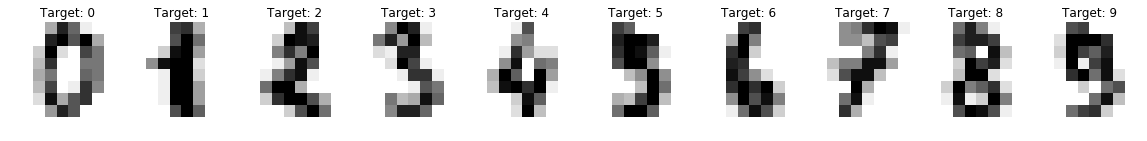

In [1]:
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, svm, metrics

digits = datasets.load_digits()

plt.close()

mlpFig, axes = plt.subplots(1,10,figsize = (20,6))
for i in range(10):
    ax = axes.ravel()[i]
    ax.axis('off')
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Target: %i' % digits.target[i])
    
plt.show()


In [2]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

x_train = data[:n_samples // 2]
y_train = digits.target[:n_samples // 2]

x_test = data[n_samples // 2 :]
y_test = digits.target[n_samples // 2 :]

### Gaussian Naive Bayes

In [3]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

gnb_pred = gnb.predict(x_test)

print("Classification Report for Gaussian Naive Bayes Classifier: \n%s\n"
      % (metrics.classification_report(y_test, gnb_pred)))

Classification Report for Gaussian Naive Bayes Classifier: 
             precision    recall  f1-score   support

          0       0.98      0.95      0.97        88
          1       0.81      0.74      0.77        91
          2       0.87      0.84      0.85        86
          3       0.88      0.79      0.83        91
          4       1.00      0.73      0.84        92
          5       0.70      0.81      0.76        91
          6       0.96      0.99      0.97        91
          7       0.65      0.81      0.72        89
          8       0.61      0.76      0.68        88
          9       0.77      0.66      0.71        92

avg / total       0.82      0.81      0.81       899




### Support Vector Classifier

In [4]:
svc = svm.SVC(gamma=0.001)
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

print("Classification Report for Support Vector Classifier: \n%s\n"
      % (metrics.classification_report(y_test, svc_pred)))

Classification Report for Support Vector Classifier: 
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899




### Convolutional Neural Network

Finally, I train a [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) with two convolution layers, max pooling and [dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf).

The code for this network is adapted from [this](https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py) example.

In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 250

img_rows, img_cols = 8, 8

Using TensorFlow backend.


In [6]:
input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train.reshape(len(x_train),img_rows,img_cols,1),
          keras.utils.to_categorical(y_train, num_classes),
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test.reshape(len(x_test),img_rows,img_cols,1),
                             keras.utils.to_categorical(y_test, num_classes))
         )

score = model.evaluate(x_test.reshape(len(x_test),img_rows,img_cols,1),
                       keras.utils.to_categorical(y_test, num_classes),
                       verbose=0)

Train on 898 samples, validate on 899 samples
Epoch 1/250
898/898 [==============================] - 0s - loss: 3.2249 - acc: 0.1325 - val_loss: 2.0931 - val_acc: 0.2536
Epoch 2/250
898/898 [==============================] - 0s - loss: 2.3822 - acc: 0.2094 - val_loss: 1.7450 - val_acc: 0.4672
Epoch 3/250
898/898 [==============================] - 0s - loss: 1.9779 - acc: 0.2751 - val_loss: 1.5666 - val_acc: 0.6641
Epoch 4/250
898/898 [==============================] - 0s - loss: 1.7202 - acc: 0.4031 - val_loss: 1.3551 - val_acc: 0.7186
Epoch 5/250
898/898 [==============================] - 0s - loss: 1.5712 - acc: 0.4677 - val_loss: 1.1797 - val_acc: 0.7264
Epoch 6/250
898/898 [==============================] - 0s - loss: 1.3757 - acc: 0.5590 - val_loss: 1.0268 - val_acc: 0.7809
Epoch 7/250
898/898 [==============================] - 0s - loss: 1.2246 - acc: 0.6158 - val_loss: 0.8452 - val_acc: 0.8788
Epoch 8/250
898/898 [==============================] - 0s - loss: 1.1271 - acc: 0.6526

In [7]:
cnn_pred = model.predict_classes(x_test.reshape(len(x_test),img_rows,img_cols,1))

print("\n\n\nClassification Report for Convolutional Neural Network Classifier: \n%s\n"
      % (metrics.classification_report(y_test, cnn_pred)))

544/899 [=================>............] - ETA: 0s


Classification Report for Convolutional Neural Network Classifier: 
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        88
          1       0.99      0.96      0.97        91
          2       0.98      1.00      0.99        86
          3       0.98      0.92      0.95        91
          4       0.99      0.93      0.96        92
          5       0.96      0.99      0.97        91
          6       0.98      1.00      0.99        91
          7       0.97      0.99      0.98        89
          8       0.98      0.98      0.98        88
          9       0.92      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


